### Задание 1. Автоматизация и визуализация данных

#### 1. Импорт необходимых библиотек

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Установка стиля для графиков
sns.set_style('darkgrid')

# Установка формата отображения чисел
pd.options.display.float_format = '{:,.2f}'.format

#### 2. Загрузка и предобработка данных

In [ ]:
# Познакомимся с данными
df = pd.read_csv('data', sep=';', engine='python', encoding='windows-1251')
df.dropna(inplace=True)
df.head(3)

,DATE,CUSTOMER_ID,номер заказа,REG_ID,REG,NAME_PARTNER,SUM_PRODUCT_1,SUM_PRODUCT_2,SUM_PRODUCT_3,SUM_PRODUCT_4,REVENUE_PRODUCT_1,REVENUE_PRODUCT_2,REVENUE_PRODUCT_3,REVENUE_PRODUCT_4
0,01.01.2025,"995,994,953.00",3344915150,14.00,Ростов-на-Дону,ООО Иванов,1,11,7,2,50.11,166.87,1092.91,54.36
1,01.01.2025,"995,635,553.00",855046890,14.00,Ростов-на-Дону,ООО Иванов,1,11,7,2,50.11,166.87,1092.91,54.36
2,01.01.2025,"533,454,659.00",882940025,19.00,Москва,ООО Иванов,26,36,110,4,1302.86,546.12,17174.3,108.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61407 entries, 0 to 61406
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DATE               61407 non-null  object 
 1   CUSTOMER_ID        61407 non-null  float64
 2   номер заказа       61407 non-null  object 
 3   REG_ID             61407 non-null  float64
 4   REG                61407 non-null  object 
 5   NAME_PARTNER       61407 non-null  object 
 6   SUM_PRODUCT_1      61407 non-null  int64  
 7   SUM_PRODUCT_2      61407 non-null  int64  
 8   SUM_PRODUCT_3      61407 non-null  int64  
 9   SUM_PRODUCT_4      61407 non-null  int64  
 10  REVENUE_PRODUCT_1  61407 non-null  object 
 11  REVENUE_PRODUCT_2  61407 non-null  object 
 12  REVENUE_PRODUCT_3  61407 non-null  object 
 13  REVENUE_PRODUCT_4  61407 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 7.0+ MB


In [ ]:
# Приведём названия столбцов к одному образцу и поработаем с типами данных
df.columns = df.columns.str.strip().str.lower()
df.rename(columns={'номер заказа': 'order_number'}, inplace=True)

# Преобразование даты
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

# Обработка идентификаторов
df['order_number'] = df['order_number'].fillna(0).astype('int64')
df['customer_id'] = df['customer_id'].fillna(0).astype('int64')
df['reg_id'] = df['reg_id'].fillna(0).astype('int64')

# Преобразование выручки в числа с плавающей точкой
revenue_columns = ['revenue_product_1', 'revenue_product_2',
                   'revenue_product_3', 'revenue_product_4']

for col in revenue_columns:
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce')

df.head(3)

,date,customer_id,order_number,reg_id,reg,name_partner,sum_product_1,sum_product_2,sum_product_3,sum_product_4,revenue_product_1,revenue_product_2,revenue_product_3,revenue_product_4
0,2025-01-01,995994953,3344915150,14,Ростов-на-Дону,ООО Иванов,1,11,7,2,50.11,166.87,"1,092.91",54.36
1,2025-01-01,995635553,855046890,14,Ростов-на-Дону,ООО Иванов,1,11,7,2,50.11,166.87,"1,092.91",54.36
2,2025-01-01,533454659,882940025,19,Москва,ООО Иванов,26,36,110,4,"1,302.86",546.12,"17,174.30",108.72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61407 entries, 0 to 61406
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               61407 non-null  datetime64[ns]
 1   customer_id        61407 non-null  int64         
 2   order_number       61407 non-null  int64         
 3   reg_id             61407 non-null  int64         
 4   reg                61407 non-null  object        
 5   name_partner       61407 non-null  object        
 6   sum_product_1      61407 non-null  int64         
 7   sum_product_2      61407 non-null  int64         
 8   sum_product_3      61407 non-null  int64         
 9   sum_product_4      61407 non-null  int64         
 10  revenue_product_1  61407 non-null  float64       
 11  revenue_product_2  61407 non-null  float64       
 12  revenue_product_3  61407 non-null  float64       
 13  revenue_product_4  61407 non-null  float64       
dtypes: datetime

#### 3. Расчёт ключевых мер

In [ ]:
# Добавим столбцы с общим количеством и стоимостью (средней и полной) проданных товаров
df['total_quantity'] = df[['sum_product_1', 'sum_product_2', 'sum_product_3', 'sum_product_4']].sum(axis=1)
df['total_revenue'] = df[['revenue_product_1', 'revenue_product_2', 'revenue_product_3', 'revenue_product_4']].sum(axis=1)
df['avg_price'] = df['total_revenue'] / df['total_quantity']

df.head(3)

,date,customer_id,order_number,reg_id,reg,name_partner,sum_product_1,sum_product_2,sum_product_3,sum_product_4,revenue_product_1,revenue_product_2,revenue_product_3,revenue_product_4,total_quantity,total_revenue,avg_price
0,2025-01-01,995994953,3344915150,14,Ростов-на-Дону,ООО Иванов,1,11,7,2,50.11,166.87,"1,092.91",54.36,21,"1,364.25",64.96
1,2025-01-01,995635553,855046890,14,Ростов-на-Дону,ООО Иванов,1,11,7,2,50.11,166.87,"1,092.91",54.36,21,"1,364.25",64.96
2,2025-01-01,533454659,882940025,19,Москва,ООО Иванов,26,36,110,4,"1,302.86",546.12,"17,174.30",108.72,176,"19,132.00",108.70


In [ ]:
total_orders = df['order_number'].nunique()
total_revenue = df['total_revenue'].sum()
avg_order_value = total_revenue / total_orders
products_sold = df['total_quantity'].sum()
avg_product_count = df['total_quantity'].mean()

print(f'Всего заказов: {total_orders:,} шт.')
print(f'Общая выручка: {total_revenue:,.2f} руб.')
print(f'Средний чек: {avg_order_value:,.2f} руб.')
print(f'Товаров продано: {products_sold:,} шт.')
print(f'Среднее количество товаров в заказе: {avg_product_count:.0f} шт.')

Всего заказов: 61,407 шт.
Общая выручка: 437,344,825.24 руб.
Средний чек: 7,122.07 руб.
Товаров продано: 7,198,952 шт.
Среднее количество товаров в заказе: 117 шт.


In [ ]:
# Рассмотрим агрегацию по регионам
region_stats = df.groupby('reg').agg(
    total_orders=('order_number', 'nunique'),
    total_revenue=('total_revenue', 'sum'),
    avg_order_value=('total_revenue', 'mean')
).reset_index()

region_stats.sort_values('total_orders', ascending=False)

,reg,total_orders,total_revenue,avg_order_value
5,Санкт-Петербург,45940,"330,553,453.63","7,195.33"
2,Москва,15428,"106,628,122.64","6,911.34"
4,Ростов-на-Дону,35,"154,926.18","4,426.46"
0,Екатеринбург,2,"3,509.15","1,754.57"
1,Казань,1,"1,560.09","1,560.09"
3,Новосибирск,1,"3,253.55","3,253.55"


#### 4 Визуализации

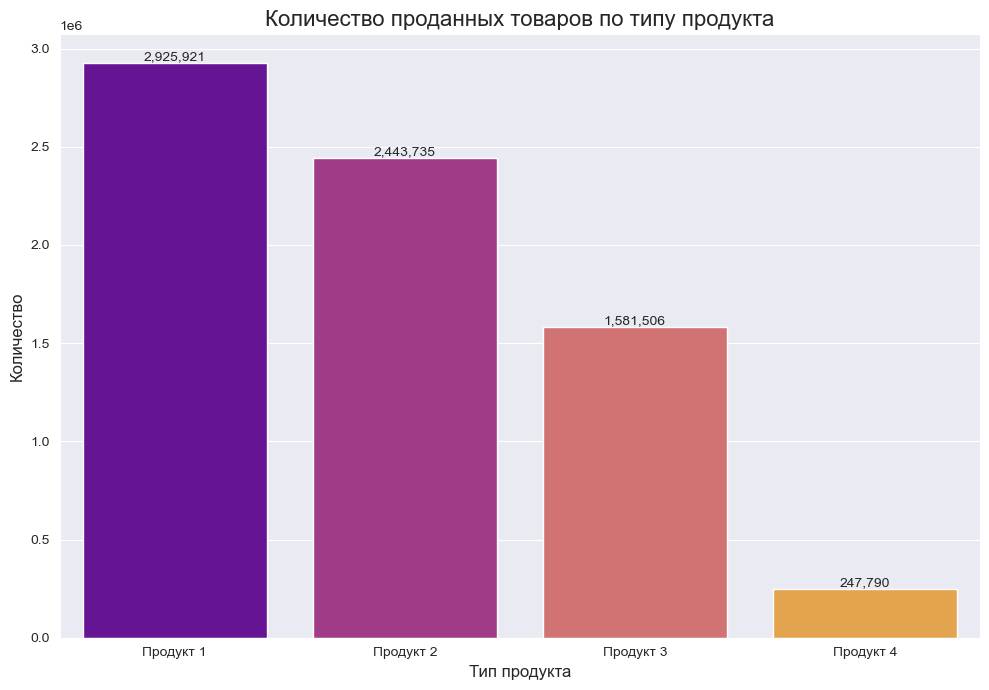

In [ ]:
# Количество проданных товаров по типу продукта
plt.figure(figsize=(10, 7))
product_quantity = df[[f'sum_product_{i}' for i in range(1, 5)]].sum().reset_index()
product_quantity.columns = ['product', 'quantity']
product_quantity['product'] = product_quantity['product'].str.replace('sum_product_', 'Продукт ')
sns.barplot(x='product', y='quantity', data=product_quantity.sort_values(by='quantity', ascending=False), palette='plasma')
plt.title('Количество проданных товаров по типу продукта', fontsize=16)
plt.xlabel('Тип продукта', fontsize=12)
plt.ylabel('Количество', fontsize=12)

for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt=lambda x: f'{x:,.0f}')

plt.tight_layout()
plt.show()

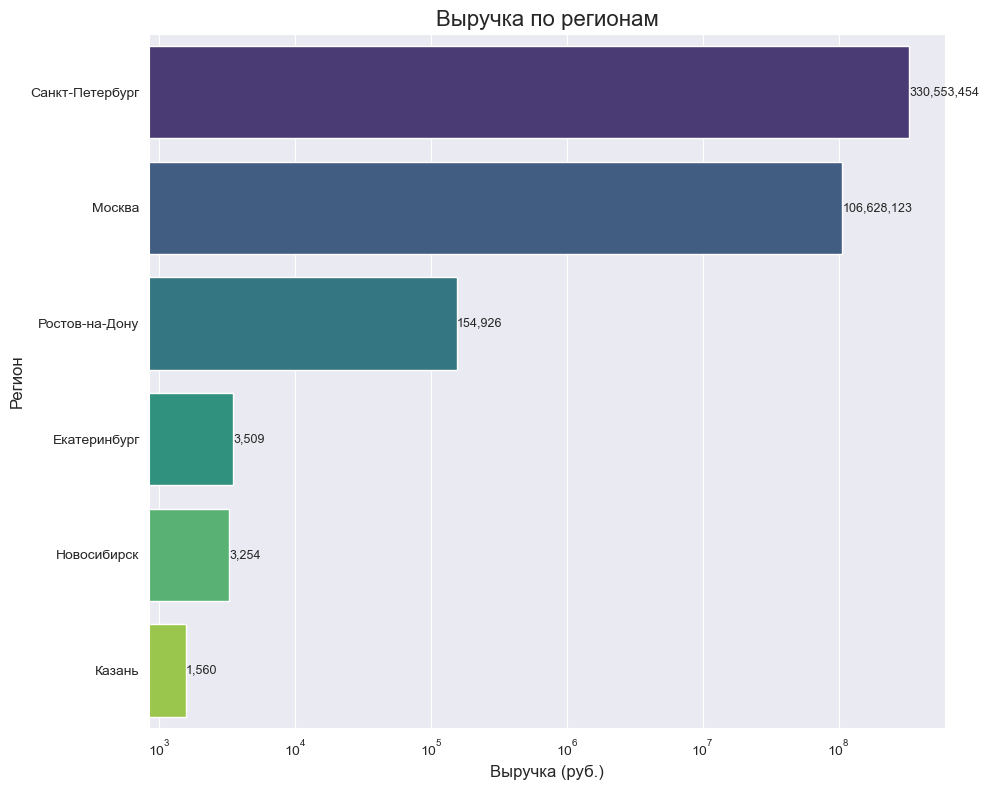

In [ ]:
# Выручка по регионам
# В связи с большим дисбалансом данных по регионам, будем использовать логарифмическую ось x
plt.figure(figsize=(10, 8))
revenue_by_region = df.groupby('reg')['total_revenue'].sum().sort_values(ascending=False)
sns.barplot(x=revenue_by_region.values, y=revenue_by_region.index, palette='viridis')

plt.title('Выручка по регионам', fontsize=16)
plt.xlabel('Выручка (руб.)', fontsize=12)
plt.ylabel('Регион', fontsize=12)
plt.xscale('log')

for index, value in enumerate(revenue_by_region.values):
    if value > 0:
        plt.text(value, index, f'{value:,.0f}', va='center', ha='left', fontsize=9)

plt.tight_layout()
plt.show()

_Можно было бы ещё рассмотреть распределение по датам или поставщикам, но в предложенном наборе данных нет такого разнообразия._

### Задание 2. Анализ данных

#### 1. Загрузка и предобработка данных

In [ ]:
# Посмотрим на данные
df = pd.read_excel('data')
df.head()

,date,region,quantity_sms
0,2025-03-01,Регион 2,139
1,2025-03-01,Регион 1,111
2,2025-03-01,Регион 3,173
3,2025-03-01,Регион 4,24
4,2025-03-01,Регион 5,132


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          3818 non-null   object
 1   region        3818 non-null   object
 2   quantity_sms  3818 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 89.6+ KB


In [ ]:
print(f'Список регионов: \n{df.region.unique()}')

Список регионов: 
['Регион 2' 'Регион 1' 'Регион 3' 'Регион 4' 'Регион 5' 'Регион 6'
 'Регион 7' 'Регион 8' 'Регион 9' 'Регион 10' 'Регион 11' 'Регион 12'
 'Регион 13' 'Регион 14' 'Регион 15' 'Регион 16' 'Регион 17' 'Регион 18'
 'Регион 19' 'Регион 20' 'Регион 21' 'Регион 22' 'Регион 23' 'Регион 24'
 'Регион 25' 'Регион 26' 'Регион 27' 'Регион 28' 'Регион 29' 'Регион 30'
 'Регион 31' 'Регион 32' 'Регион 33' 'Регион 34' 'Регион 35' 'Регион 36'
 'Регион 37' 'Регион 38' 'Регион 39' 'Регион 40' 'Регион 41' 'Регион 42'
 'Регион 43' 'Регион 44' 'Регион 45' 'Регион 46' 'Регион 47' 'Регион 48'
 'Регион 49' 'Регион 50' 'Регион 51' 'Регион 52' 'Регион 53' 'Регион 54'
 'Регион 55' 'Регион 56' 'Регион 57' 'Регион 58' 'Регион 59' 'Регион 60'
 'Регион 61']


In [ ]:
print(f'Временной диапазон: {df.date.min()} - {df.date.max()}')

Временной диапазон: 2025-03-01 - 2025-06-22


In [ ]:
# Общее кол-во смс по регионам
reg_sms_count = df.groupby('region')['quantity_sms'].sum().sort_values(ascending=False)
print('Регионы с максимальным общим количеством отправленных SMS:', reg_sms_count[:5], sep='\n', end='\n\n')
print('Регионы с минимальным общим количеством отправленных SMS:', reg_sms_count.tail(5), sep='\n')

Регионы с максимальным общим количеством отправленных SMS:
region
Регион 14    794411
Регион 24    293901
Регион 9     122759
Регион 19     85846
Регион 29     79034
Name: quantity_sms, dtype: int64

Регионы с минимальным общим количеством отправленных SMS:
region
Регион 54    2
Регион 53    2
Регион 41    2
Регион 45    2
Регион 56    2
Name: quantity_sms, dtype: int64


#### 2. Визуализации

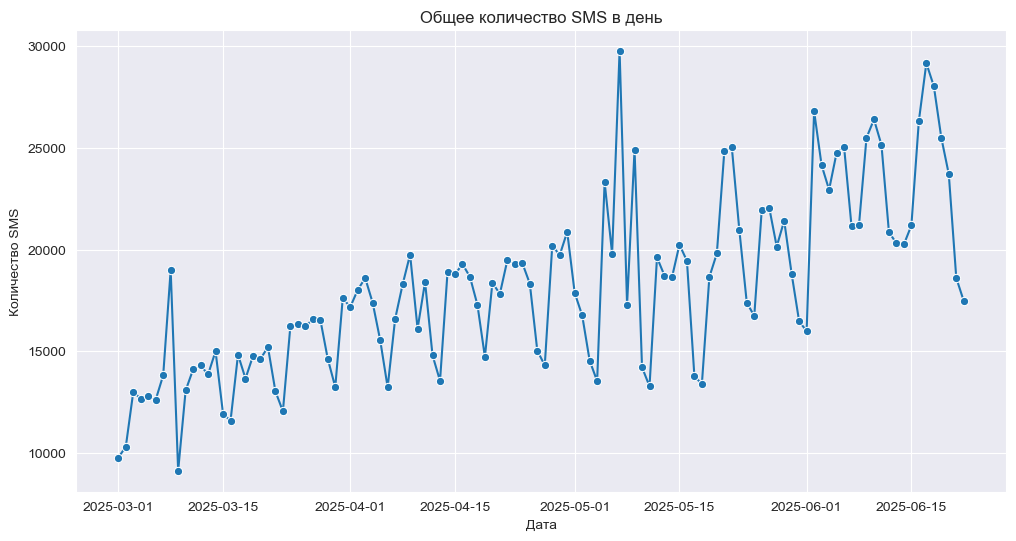

In [ ]:
# Посмотрим на общее количество SMS по дням
df['date'] = pd.to_datetime(df['date']) # Преобразуем столбец 'date' в формат даты
daily_sms = df.groupby('date')['quantity_sms'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='quantity_sms', data=daily_sms, marker='o')
plt.title('Общее количество SMS в день')
plt.xlabel('Дата')
plt.ylabel('Количество SMS')
plt.grid(True)
plt.show()

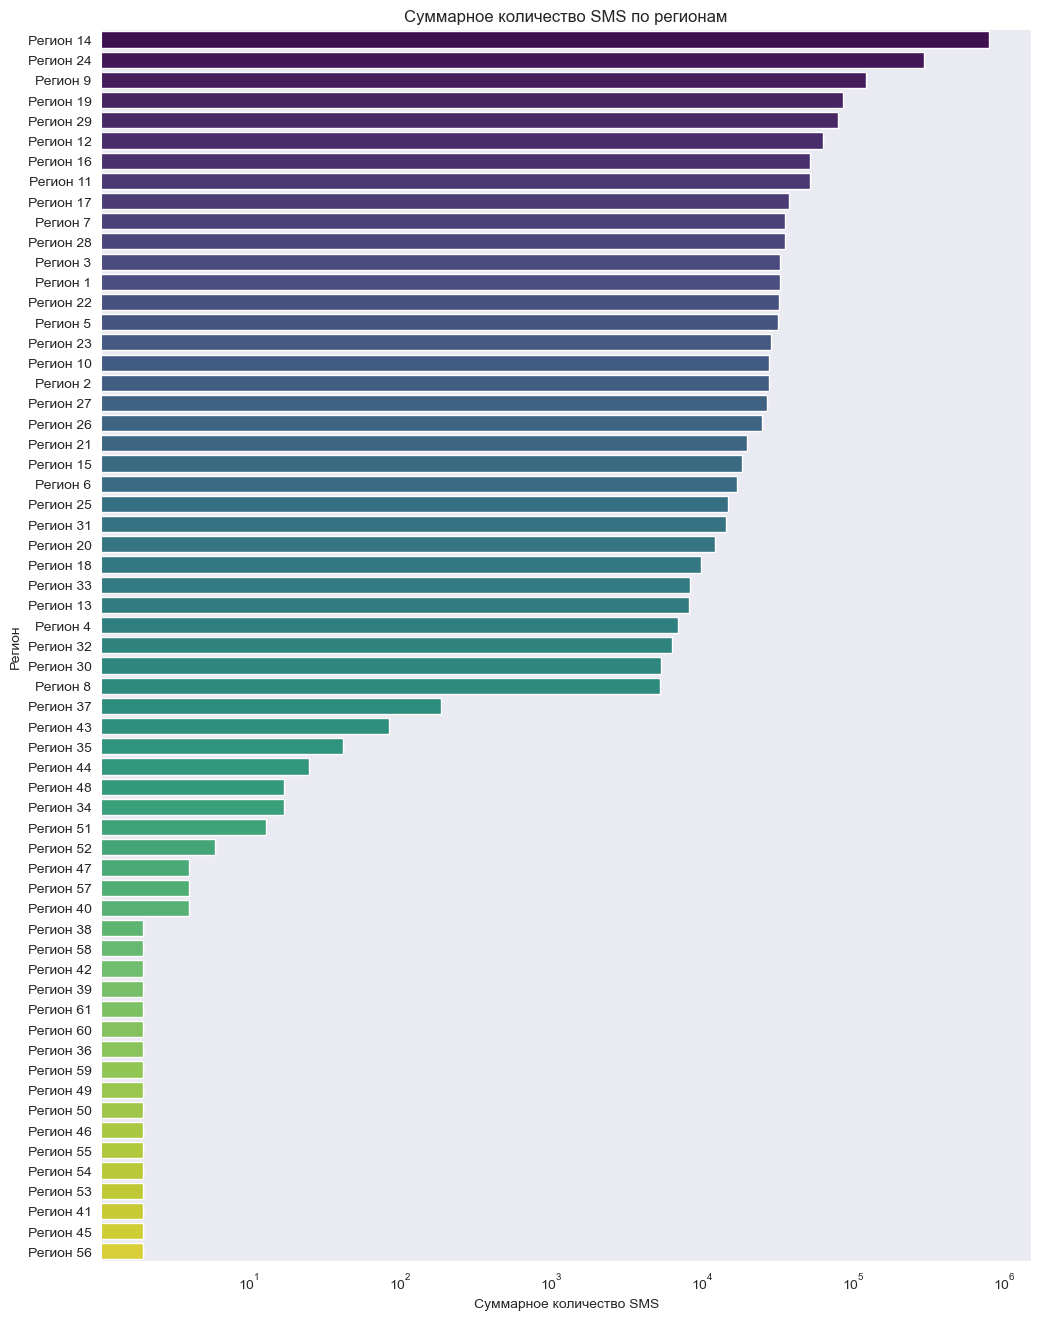

In [ ]:
# Агрегация данных по регионам
region_sms = df.groupby('region')['quantity_sms'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 16))
sns.barplot(x='quantity_sms', y='region', data=region_sms, palette='viridis')
plt.title('Суммарное количество SMS по регионам')
plt.xlabel('Суммарное количество SMS')
plt.ylabel('Регион')
plt.grid(axis='x')
plt.xscale('log')
plt.show()

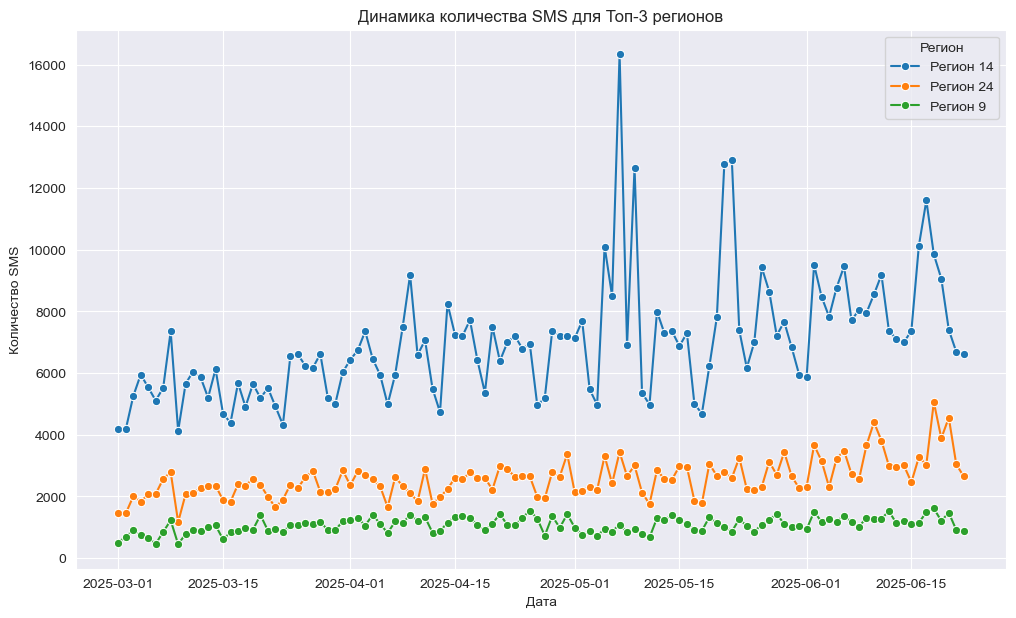

In [ ]:
# Выберем топ-3 региона
top_3_regions = region_sms.head(3)['region'].tolist()
df_top_3 = df[df['region'].isin(top_3_regions)]

# Агрегация по дате и региону
daily_top_3_sms = df_top_3.groupby(['date', 'region'])['quantity_sms'].sum().unstack().fillna(0).reset_index()

plt.figure(figsize=(12, 7))
daily_top_3_sms_melted = daily_top_3_sms.melt(id_vars=['date'], var_name='region', value_name='quantity_sms')
sns.lineplot(x='date', y='quantity_sms', hue='region', data=daily_top_3_sms_melted, marker='o')
plt.title('Динамика количества SMS для Топ-3 регионов')
plt.xlabel('Дата')
plt.ylabel('Количество SMS')
plt.legend(title='Регион')
plt.grid(True)
plt.show()

#### 3. Вопросы

1. Каково общее количество SMS, отправленных за каждый день?
2. Какие регионы являются лидерами по количеству отправленных SMS?
3. Как меняется среднее количество SMS, отправляемых в день, с течением времени?
4. Есть ли дни недели или определенные даты, когда количество SMS значительно увеличивается\уменьшается для всех регионов?
5. Какие значения `quantity_sms` можно считать аномальными и чем они могут быть вызваны?
6. Есть ли корреляция между количеством SMS и каким-либо внешним событием?

### Задание 3. Автоматизация расчёта среднего чека по заказам

```SQL
SELECT
    c.customer_name,
    o.customer_id,
    TO_CHAR(o.order_date, 'YYYY-MM') AS year_month,
    AVG(o.total_amount) AS average_order_value
FROM
    Orders o
JOIN
    Customers c ON o.customer_id = c.customer_id
WHERE
    o.order_status IN ('Завершен', 'Оплачен')
    AND o.order_date >= CURRENT_DATE - INTERVAL '1 year'
GROUP BY
    c.customer_name,
    o.customer_id,
    TO_CHAR(o.order_date, 'YYYY-MM')
ORDER BY
    c.customer_name,
    year_month DESC;
```